# PCA through Singular Value Decomposition

In [3]:
import numpy as np


X = np.array([[2, 1, 0],
              [4, 3, 0]], dtype=float)

mu = X.mean(axis=1, keepdims=True)
Xc = X - mu

R = np.cov(Xc, bias=False)
print("R (cov):\n", R)


U, S, Vt = np.linalg.svd(R)
u1 = U[:, 0]
u2 = U[:, 1]

print("\nU:\n", U)
print("S (singular values):", S)
print("u1:", u1)
print("u2:", u2)


Xi1 = u1.T @ Xc
Xi2 = u2.T @ Xc

print("\nXi1:", Xi1)
print("Xi2:", Xi2)


Xc_approx_1D = np.outer(u1, Xi1)
X_approx_1D = Xc_approx_1D + mu


Xc_recon = np.outer(u1, Xi1) + np.outer(u2, Xi2)
X_recon = Xc_recon + mu

print("\nX original:\n", X)
print("\nX recon (full, should match):\n", X_recon)
print("\nMax abs diff:", np.max(np.abs(X - X_recon)))

print("\nX approx 1D (only PC1):\n", X_approx_1D)

R (cov):
 [[1.         2.        ]
 [2.         4.33333333]]

U:
 [[-0.4241554  -0.90558942]
 [-0.90558942  0.4241554 ]]
S (singular values): [5.27008323 0.06325011]
u1: [-0.4241554  -0.90558942]
u2: [-0.90558942  0.4241554 ]

Xi1: [-1.9334711  -0.60372628  2.53719738]
Xi2: [-0.19866376  0.28277026 -0.0841065 ]

X original:
 [[2. 1. 0.]
 [4. 3. 0.]]

X recon (full, should match):
 [[2.00000000e+00 1.00000000e+00 1.11022302e-15]
 [4.00000000e+00 3.00000000e+00 4.44089210e-16]]

Max abs diff: 1.1102230246251565e-15

X approx 1D (only PC1):
 [[ 1.8200922   1.25607376 -0.07616596]
 [ 4.08426431  2.88006147  0.03567423]]


# PCA on Iris data

In [4]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

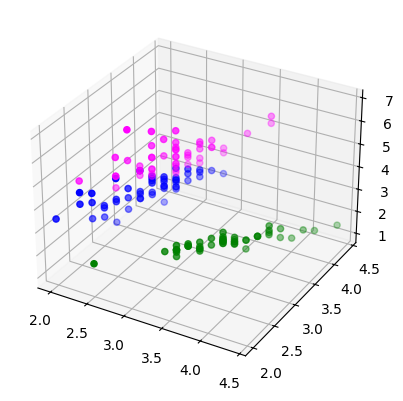

In [5]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


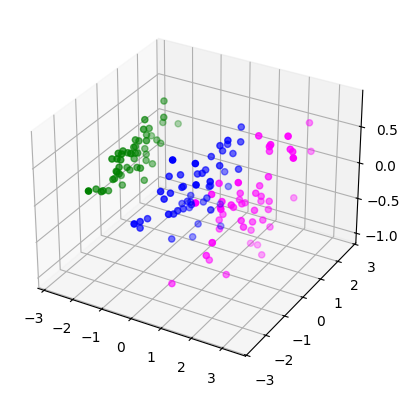

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)

pca = PCA(n_components=3)
Xpca = pca.fit_transform(Xpp)

print(pca.get_covariance())

axes2 = plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0], Xpca[y==0,1], Xpca[y==0,2], color='green')
axes2.scatter3D(Xpca[y==1,0], Xpca[y==1,1], Xpca[y==1,2], color='blue')
axes2.scatter3D(Xpca[y==2,0], Xpca[y==2,1], Xpca[y==2,2], color='magenta')
plt.show()

In [8]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [9]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [10]:
# Plot the principal components in 2D, mark different targets in color


# KNN classifier

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


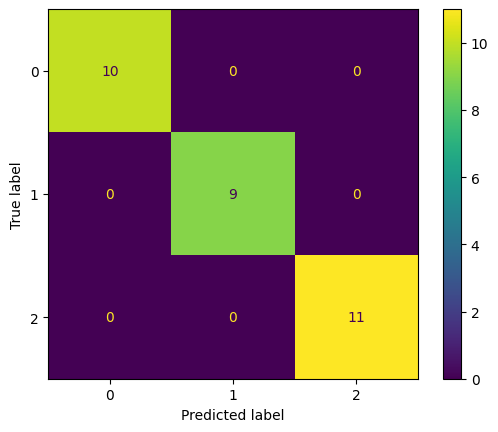

In [12]:
# Split data
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train KNN
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)

knn1.fit(X_train, y_train)
ypred = knn1.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, ypred)
print(cm)

ConfusionMatrixDisplay.from_predictions(y_test, ypred)
plt.show()

Confusion matrix (PCA 2 components):
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


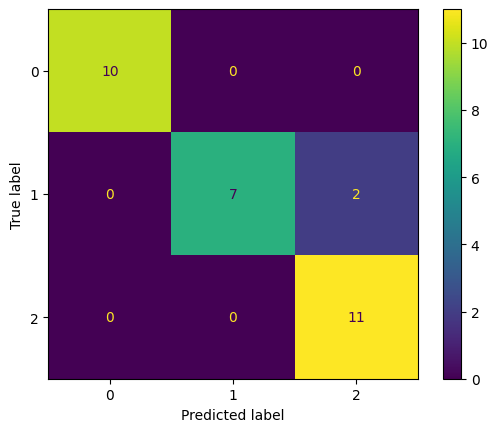

In [13]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset
# Use only first 2 PCA components
X_pca_2 = Xpca[:, :2]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca_2, y, test_size=0.2, random_state=42
)

from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train, y_train)

y_pred_pca = knn_pca.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Confusion matrix (PCA 2 components):")
print(confusion_matrix(y_test, y_pred_pca))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pca)
plt.show()

Confusion matrix (Original 2 features):
[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]


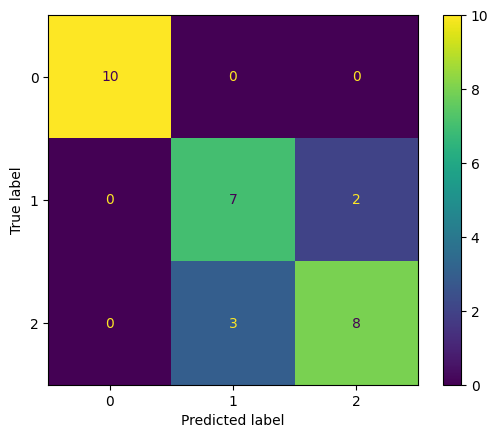

In [14]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
# Use only first 2 original features
X_2 = X[:, :2]

X_train, X_test, y_train, y_test = train_test_split(
    X_2, y, test_size=0.2, random_state=42
)

knn_orig2 = KNeighborsClassifier(n_neighbors=3)
knn_orig2.fit(X_train, y_train)

y_pred_orig2 = knn_orig2.predict(X_test)

print("Confusion matrix (Original 2 features):")
print(confusion_matrix(y_test, y_pred_orig2))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_orig2)
plt.show()